In [1]:
from datasets import load_dataset
import pandas as pd

dataset = load_dataset("imodels/credit-card")
df = pd.DataFrame(dataset['train'])

/home/dom/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#check if duplicates occurred
print(df.duplicated()[df.duplicated() == True])
df = df.drop_duplicates()

3070     True
4687     True
6413     True
7683     True
8747     True
9434     True
11338    True
11364    True
11871    True
12178    True
14745    True
15307    True
15867    True
16224    True
17526    True
17916    True
18390    True
18521    True
19465    True
19530    True
21794    True
22338    True
22445    True
22481    True
23194    True
dtype: bool


In [3]:
import numpy as np

age = df['age']
sex_male = df['sex:1']
sex_female = df['sex:2']
limit_bal = df['limit_bal']

print(np.corrcoef(age,limit_bal))


[[1.         0.14902564]
 [0.14902564 1.        ]]


In [4]:
sumOfBills = (df['bill_amt1'] + df['bill_amt2'] + df['bill_amt3'] +
              df['bill_amt4'] + df['bill_amt5'] + df['bill_amt6'])
df.insert(0, "Sum_bill_amt", sumOfBills)

In [5]:
df = df.sort_values(by='age', ascending=False)

#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
df.loc[df['education:0'] == 1, 'education'] = 'graduate school'
df.loc[df['education:1'] == 1, 'education'] = 'university'
df.loc[df['education:2'] == 1, 'education'] = 'high school'
df.loc[df['education:3'] == 1, 'education'] = 'others'
df.loc[df['education:4'] == 1, 'education'] = 'unknown'
df.loc[df['education:5'] == 1, 'education'] = 'unknown'

#create new dataset with top 10 oldest peoples
maxAge = pd.DataFrame(df[:10])
newDf = pd.concat([
    maxAge['limit_bal'],
    maxAge['age'],
    maxAge['education'],
    maxAge['Sum_bill_amt']
], axis=1)  

print(newDf)

       limit_bal   age    education  Sum_bill_amt
99      440000.0  79.0   university     2647383.0
2728    210000.0  75.0  high school     1229123.0
17116   180000.0  75.0   university           0.0
11932   250000.0  75.0  high school       63417.0
7491    160000.0  74.0       others      251463.0
4589     80000.0  73.0       others      416184.0
3378    500000.0  73.0  high school       21059.0
7762    360000.0  73.0       others           0.0
21102   140000.0  73.0  high school      817109.0
8376    150000.0  72.0       others       11657.0


TypeError: 'Text' object is not callable

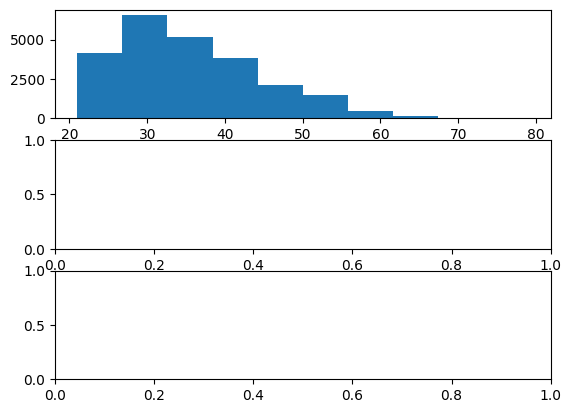

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3)

axs[0].hist(df['age'])
fig[0].title("Age histogram")
axs[1].hist(df['limit_bal'])
fig[1].title("Limit bal histogram")
axs[2].plot(df['age'], df['limit_bal'],'o')
fig[1].title("Limit_bal(age)")
print(np.corrcoef(age,limit_bal))